In [1]:
import sys
sys.path

['D:\\bio\\jupyter_code\\STARmap',
 'D:\\anaconda\\envs\\paste\\python310.zip',
 'D:\\anaconda\\envs\\paste\\DLLs',
 'D:\\anaconda\\envs\\paste\\lib',
 'D:\\anaconda\\envs\\paste',
 '',
 'C:\\Users\\23147\\AppData\\Roaming\\Python\\Python310\\site-packages',
 'D:\\anaconda\\envs\\paste\\lib\\site-packages',
 'D:\\anaconda\\envs\\paste\\lib\\site-packages\\win32',
 'D:\\anaconda\\envs\\paste\\lib\\site-packages\\win32\\lib',
 'D:\\anaconda\\envs\\paste\\lib\\site-packages\\Pythonwin']

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import paste as pst
import ot

In [3]:
sample_names = ["BZ5","BZ9","BZ14"]
input_dir = 'G:/dataset/STARmap/input/'
output_dir = 'G:/dataset/STARmap/output/paste/'
experiment_name = 'STARmap'

# Load Slices

In [4]:
# slice_name = "allEmbryo"
# slice_i = sc.read_csv(input_dir + slice_name + "matrix.csv")
# print(slice_i)

In [5]:
adata_list = []
meta = list()
for dataset in sample_names:
    print(dataset)
    
    # adata = sc.read_visium(input_dir + dataset)
    # adata.var_names_make_unique()
    # adata.obs_names_make_unique()
    adata = sc.read_h5ad(input_dir+dataset+'/'+dataset+'.h5ad')

    df = adata.obs[['x','y']]
    adata.obsm['spatial'] = df.values

    # adata.obs['annotation'] = adata.obs['ClusterName']
    # adata.obs = adata.obs[~pd.isna(adata.obs['x'])]
    # adata = adata.drop(adata.loc[pd.isna(adata.obs['x'])])
    # adata.obs= adata.obs[~adata.obs.ClusterName.str.contains("NA")]
    adata = adata[~pd.isna(adata.obs['x'])]
    
    meta.extend(adata.obs['ClusterName'].tolist())
    
    sc.pp.filter_genes(adata, min_counts = 15)
    sc.pp.filter_cells(adata, min_counts = 100)
    
    adata_list.append(adata)

celltypes = pd.Series(data=meta).astype("category").value_counts().index.tolist()
n_colors = len(celltypes)
print(celltypes)
print(n_colors)

BZ5
BZ9
BZ14
['eL6-1', 'eL5-3', 'eL2/3', 'L5-1', 'eL6-2', 'Astro', 'eL5-2', 'Smc', 'Endo', 'Oligo', 'Lhx6', 'SST', 'NPY', 'Reln', 'VIP']
15


D:\anaconda\envs\paste\lib\site-packages\scanpy\preprocessing\_simple.py:249: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_counts'] = number
D:\anaconda\envs\paste\lib\site-packages\scanpy\preprocessing\_simple.py:249: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_counts'] = number
D:\anaconda\envs\paste\lib\site-packages\scanpy\preprocessing\_simple.py:249: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_counts'] = number


In [6]:
adata= adata[~pd.isna(adata.obs['x'])]
adata.obs

,orig.ident,nCount_STARmap,nFeature_STARmap,CellID,ClusterID,ClusterName,x,y,c,z,batch,n_counts
4,0,179.0,31,3,11,Astro,47.487014,2552.712465,Astro,1,BZ14,179.0
9,0,159.0,28,8,3,eL5-3,69.108555,6220.878702,eL5-3,1,BZ14,159.0
10,0,126.0,15,9,6,VIP,83.638439,2247.792100,VIP,1,BZ14,126.0
13,0,226.0,24,12,13,Endo,117.192515,53.849495,Endo,1,BZ14,226.0
14,0,142.0,26,13,11,Astro,157.073169,3715.092949,Astro,1,BZ14,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1204,0,147.0,29,1203,11,Astro,12138.610163,4586.796848,Astro,4,BZ14,147.0
1206,0,361.0,35,1205,10,NPY,12214.484558,5199.407180,NPY,4,BZ14,361.0
1211,0,113.0,25,1210,12,Oligo,12284.531623,3491.955918,Oligo,4,BZ14,113.0
1212,0,251.0,36,1211,10,NPY,12273.803086,5332.398013,NPY,4,BZ14,251.0


In [7]:
cluster = adata_list[1].obs['x']
print(adata_list[1].obs)
print(cluster)
aa = pd.isna(cluster)
print(aa)
adata = adata_list[1]
bb = adata.obs[~pd.isna(adata.obs['x'])]
print(bb)

      orig.ident  nCount_STARmap  nFeature_STARmap  CellID  ClusterID  \
1              0           255.0                21       0         11   
3              0           128.0                16       2          3   
5              0           149.0                26       4          6   
9              0           136.0                22       8         13   
12             0           155.0                27      11         11   
...          ...             ...               ...     ...        ...   
1356           0           170.0                26    1355          4   
1359           0           126.0                22    1358          3   
1360           0           124.0                23    1359          4   
1361           0           178.0                29    1360          5   
1362           0           140.0                21    1361         14   

     ClusterName             x            y      c  z batch  n_counts  
1            VIP     43.624820  5377.364252    VIP 

In [8]:
for adata in adata_list:
    print(adata)

AnnData object with n_obs × n_vars = 1049 × 166
    obs: 'orig.ident', 'nCount_STARmap', 'nFeature_STARmap', 'CellID', 'ClusterID', 'ClusterName', 'x', 'y', 'c', 'z', 'batch', 'n_counts'
    var: 'features', 'n_counts'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 1053 × 165
    obs: 'orig.ident', 'nCount_STARmap', 'nFeature_STARmap', 'CellID', 'ClusterID', 'ClusterName', 'x', 'y', 'c', 'z', 'batch', 'n_counts'
    var: 'features', 'n_counts'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 1088 × 166
    obs: 'orig.ident', 'nCount_STARmap', 'nFeature_STARmap', 'CellID', 'ClusterID', 'ClusterName', 'x', 'y', 'c', 'z', 'batch', 'n_counts'
    var: 'features', 'n_counts'
    obsm: 'spatial'


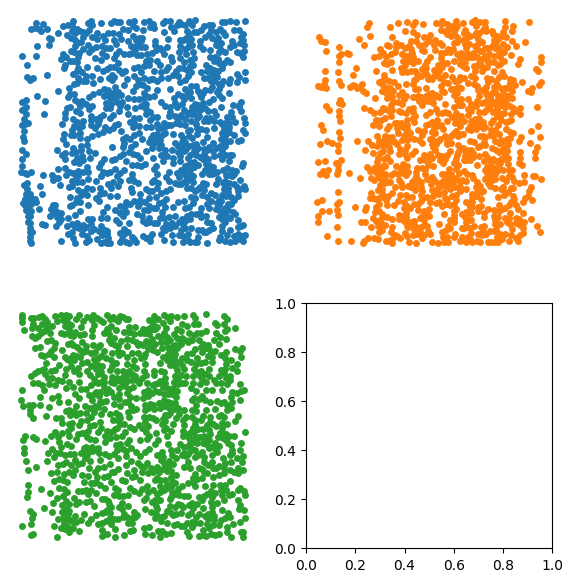

In [9]:
import seaborn as sns
slice_colors = sns.color_palette(n_colors = n_colors).as_hex()

fig, axs = plt.subplots(2, 2,figsize=(7,7))
i = 0
for adata in adata_list:
    pst.plot_slice(adata,slice_colors[i],ax=axs[int(i/2),int(i%2)])
    i = i + 1
    
plt.show()

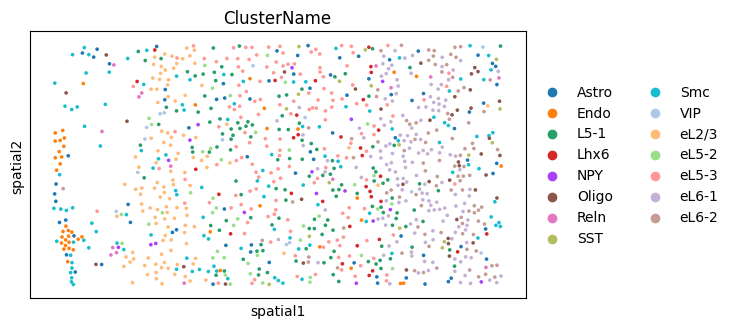

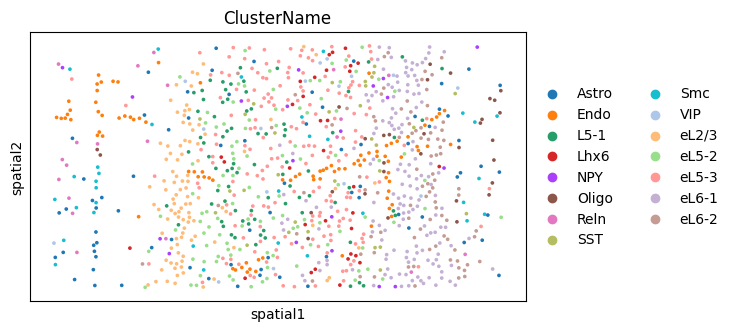

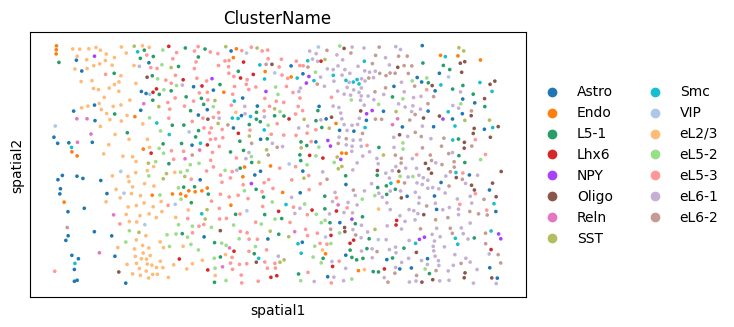

In [10]:
for adata in adata_list:
    sc.pl.spatial(adata, color = "ClusterName", spot_size = 100)

In [11]:
# import seaborn as sns
# import numpy as np
# import matplotlib.pyplot as plt

# # seaborn.color_palette(palette = None, n_colors = None, desat = None)

# current_palette = sns.color_palette(n_colors = 6)
# sns.palplot(current_palette)
# plt.show()
# print(sns.color_palette(n_colors = 6).as_hex())

# run PASTE

In [12]:
import time
start = time.time()

pis = []
for i in range(len(adata_list)-1):
    pi_temp = pst.pairwise_align(adata_list[i], adata_list[i+1], backend = ot.backend.TorchBackend(), use_gpu = True)
    pis.append(pi_temp)
    
print('Runtime: ' + str(time.time() - start))

gpu is available, using gpu.
gpu is available, using gpu.
Runtime: 14.367452383041382


In [13]:
print(pis)

[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00073582, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.0001833 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00085802, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0001222 ]], dtype=float32)]


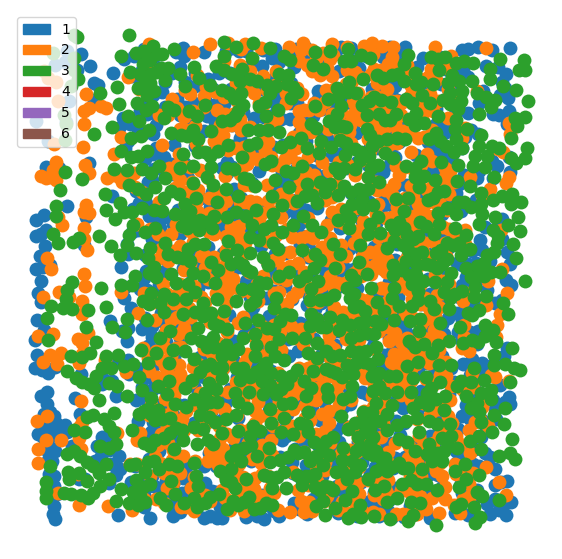

In [14]:
# To visualize the alignment you can stack the slices 
# according to the alignment pi
new_slices = pst.stack_slices_pairwise(adata_list, pis)

plt.figure(figsize=(7,7))
for i in range(len(new_slices)):
    pst.plot_slice(new_slices[i],slice_colors[i],s=400)
plt.legend(handles=[mpatches.Patch(color=slice_colors[0], label='1'),mpatches.Patch(color=slice_colors[1], label='2'),mpatches.Patch(color=slice_colors[2], label='3'),mpatches.Patch(color=slice_colors[3], label='4'),mpatches.Patch(color=slice_colors[4], label='5'),mpatches.Patch(color=slice_colors[5], label='6')])
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

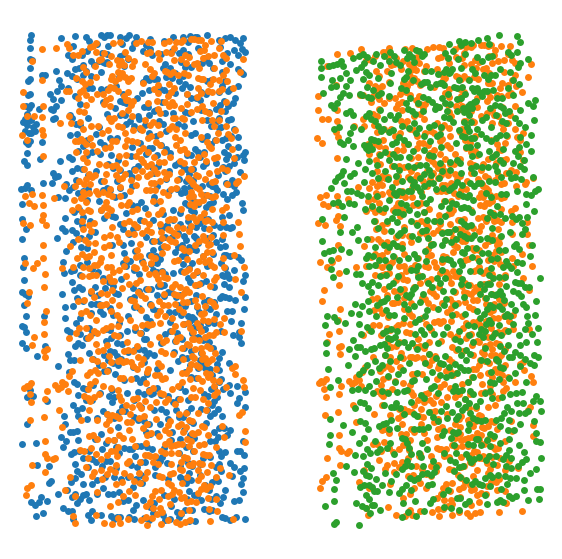

In [15]:
# slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']

fig, axs = plt.subplots(1, 2,figsize=(7,7))
for i in range(len(adata_list)-1):
    pst.plot_slice(new_slices[i], slice_colors[i], ax=axs[int(i%2)])
    pst.plot_slice(new_slices[i+1], slice_colors[i+1], ax=axs[int(i%2)])
    
# fig.delaxes(axs[1,1])
plt.show()

In [16]:
type(adata_list[0].obsm['spatial'])

numpy.ndarray

In [17]:
# save coor
new_coord = new_slices[0].obsm['spatial']
cells = new_slices[0].obs_names
for i in range(1, len(adata_list)):
    new_coord = np.vstack((new_coord, new_slices[i].obsm['spatial']))
    cells = np.hstack((cells, new_slices[i].obs_names))

# new_coord=np.vstack((new_slices[0].obsm['spatial'],
#                     new_slices[1].obsm['spatial']))
# cells=np.hstack((new_slices[0].obs_names,new_slices[1].obs_names))

new_coord=pd.DataFrame(new_coord,index=cells,columns=['x','y'])
new_coord.to_csv(output_dir + "paste_coord_" + experiment_name + ".csv")

## center slice mode

In [19]:
slices = adata_list

initial_slice = slices[0].copy()
lmbda = len(slices)*[1/len(slices)]

pst.filter_for_common_genes(slices)

b = []
for i in range(len(slices)):
    b.append(pst.match_spots_using_spatial_heuristic(slices[0].X.todense(), slices[i].X.todense()))

Filtered all slices for common genes. There are 165 common genes.


In [20]:
type(slices[0].X.dtype)

numpy.dtype[float64]

In [21]:
start = time.time()
## Possible to pass in an initial pi (as keyword argument pis_init) 
## to improve performance, see Tutorial.ipynb notebook for more details.
# center_slice, pis = pst.center_align(initial_slice, slices, lmbda) 

# center_slice, pis = pst.center_align(initial_slice, slices, lmbda, random_seed = 5, backend = ot.backend.TorchBackend(), use_gpu = True)
center_slice, pis = pst.center_align(initial_slice, slices, lmbda, pis_init = b, backend = ot.backend.TorchBackend(), use_gpu = True) 

print('Runtime: ' + str(time.time() - start))

gpu is available, using gpu.
Filtered all slices for common genes. There are 165 common genes.


D:\anaconda\envs\paste\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Iteration: 0
Solving Pairwise Slice Alignment Problem.
Solving Center Mapping NMF Problem.


D:\anaconda\envs\paste\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Objective  -5900747.703946313
Difference: 5900747.703946313

Iteration: 1
Solving Pairwise Slice Alignment Problem.
Solving Center Mapping NMF Problem.


D:\anaconda\envs\paste\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Objective  27329.789484102927
Difference: 5928077.493430416

Iteration: 2
Solving Pairwise Slice Alignment Problem.
Solving Center Mapping NMF Problem.


D:\anaconda\envs\paste\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Objective  27329.781895533077
Difference: 0.007588569849758642

Iteration: 3
Solving Pairwise Slice Alignment Problem.
Solving Center Mapping NMF Problem.
Objective  27329.786983732192
Difference: 0.00508819911556202

Iteration: 4
Solving Pairwise Slice Alignment Problem.
Solving Center Mapping NMF Problem.


D:\anaconda\envs\paste\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Objective  27329.784258865016
Difference: 0.002724867175857071

Iteration: 5
Solving Pairwise Slice Alignment Problem.
Solving Center Mapping NMF Problem.


D:\anaconda\envs\paste\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Objective  27329.794000175876
Difference: 0.009741310859681107

Iteration: 6
Solving Pairwise Slice Alignment Problem.
Solving Center Mapping NMF Problem.


D:\anaconda\envs\paste\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Objective  27329.790975901982
Difference: 0.0030242738939705305

Iteration: 7
Solving Pairwise Slice Alignment Problem.
Solving Center Mapping NMF Problem.
Objective  27329.790549392994
Difference: 0.0004265089883119799

Runtime: 26.91211485862732


D:\anaconda\envs\paste\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [22]:
W = center_slice.uns['paste_W']
H = center_slice.uns['paste_H']

In [23]:
print(type(W))
print(type(H))
print(W)
print(H)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[5.80054334e-13 2.85793725e-15 6.94225778e-01 ... 3.92662876e-02
  2.55283398e-01 6.99267607e-02]
 [1.75878885e-03 5.73572246e-30 9.58526396e-04 ... 1.23156656e+00
  6.98325633e-02 2.38955413e-01]
 [2.12003714e-01 8.23016117e-01 1.63314751e-01 ... 1.76454091e-23
  1.06036262e-13 5.15150862e-30]
 ...
 [4.05179185e-05 5.13367365e-09 7.38621797e-08 ... 6.47977022e-02
  2.60999292e-01 1.13523290e-01]
 [3.36294218e-02 8.31633286e-02 1.07983122e-03 ... 1.08161306e-02
  2.21332342e-01 2.16458684e-24]
 [1.47880637e-03 3.40732926e-01 3.17751118e-01 ... 1.23345902e-05
  1.13919085e-03 2.85840420e+00]]
[[2.00716867e-01 1.20272046e-01 7.75722204e+00 ... 6.20329240e-04
  1.27760550e-01 0.00000000e+00]
 [1.08928536e-01 1.80672547e-12 9.64905237e-01 ... 1.09781677e-01
  3.31958057e-06 0.00000000e+00]
 [3.07947882e-01 2.12202242e+00 1.20725597e+00 ... 4.29399339e+00
  2.82724604e-02 3.60063610e-08]
 ...
 [1.75426168e-01 7.27862273e-02 1.01080562e+00 ...

In [24]:
print(W.shape)
print(H.shape)

(1049, 15)
(15, 165)


In [25]:
np.savetxt(output_dir + experiment_name +"_W.csv", W, delimiter=",")
np.savetxt(output_dir + experiment_name +"_H.csv", H, delimiter=",")

In [26]:
center, new_slices = pst.stack_slices_center(center_slice, slices, pis)

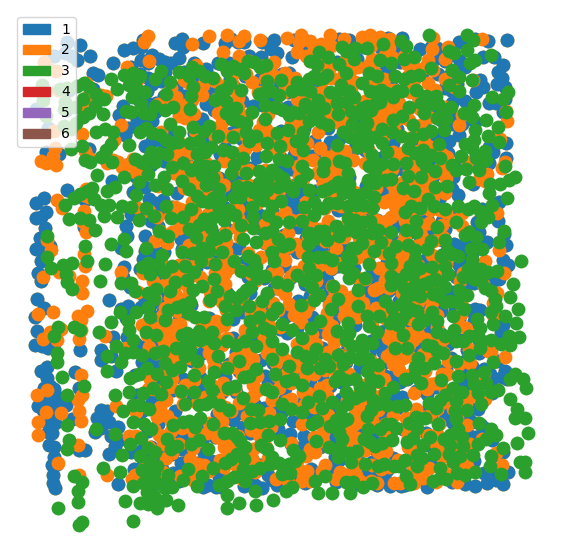

In [27]:
center_color = 'orange'
# slices_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
slice_colors = sns.color_palette(n_colors = n_colors).as_hex()

plt.figure(figsize=(7,7))
pst.plot_slice(center,center_color,s=400)
for i in range(len(new_slices)):
    pst.plot_slice(new_slices[i],slice_colors[i],s=400)

plt.legend(handles=[mpatches.Patch(color=slice_colors[0], label='1'),mpatches.Patch(color=slice_colors[1], label='2'),mpatches.Patch(color=slice_colors[2], label='3'),mpatches.Patch(color=slice_colors[3], label='4'),mpatches.Patch(color=slice_colors[4], label='5'),mpatches.Patch(color=slice_colors[5], label='6')])
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

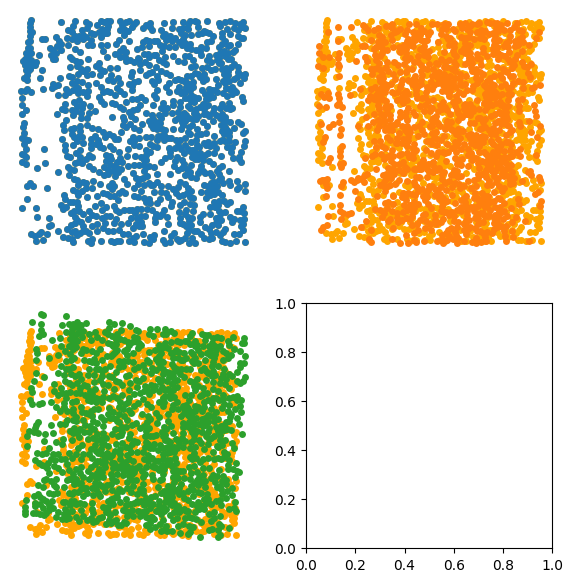

In [28]:
center_color = 'orange'
# slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']

fig, axs = plt.subplots(2, 2,figsize=(7,7))
for i in range(len(new_slices)):
    pst.plot_slice(center,center_color,ax=axs[int(i/2),int(i%2)])
    pst.plot_slice(new_slices[i],slice_colors[i],ax=axs[int(i/2),int(i%2)])
plt.show()